In [1]:
import pandas as pd
import numpy as np
import csv
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [14]:
# QUESTION 1: Find the support value of the each combination of the items.
# creating / assuming a dataset
Cust_id = [1,2,3,4,5,6,7,8,9,10]
#Items = [['Apples'],['Apples','Bananas'],['Oranges','Bananas'],['Apples','Bananas','Oranges'],['Oranges'],['Apples','Bananas'],['Oranges','Bananas'],['Bananas'],['Apples','Oranges'],['Bananas']]
Items = [['pickles','chocolate','french fries','cake','cookies','soup' ],
         ['tomatoes','muffins','cake','pasta','soup'],
         ['bread','milk','cookies','salt','almond'],
         ['french fries','milk','cookies','almond'],
         ['milk','bread','soup','pasta','cake'],
         ['pickles'],
         ['french fries','cookies'],
         ['bread','pasta'],
         ['chocolate','almond'],
         ['milk','cookies']]
data1 = pd.DataFrame(list(zip(Cust_id,Items)),columns=['Customer_Id','Items_bought'])
data1

,Customer_Id,Items_bought
0,1,"[pickles, chocolate, french fries, cake, cooki..."
1,2,"[tomatoes, muffins, cake, pasta, soup]"
2,3,"[bread, milk, cookies, salt, almond]"
3,4,"[french fries, milk, cookies, almond]"
4,5,"[milk, bread, soup, pasta, cake]"
5,6,[pickles]
6,7,"[french fries, cookies]"
7,8,"[bread, pasta]"
8,9,"[chocolate, almond]"
9,10,"[milk, cookies]"


In [15]:
l=list(data1['Items_bought'])
l

[['pickles', 'chocolate', 'french fries', 'cake', 'cookies', 'soup'],
 ['tomatoes', 'muffins', 'cake', 'pasta', 'soup'],
 ['bread', 'milk', 'cookies', 'salt', 'almond'],
 ['french fries', 'milk', 'cookies', 'almond'],
 ['milk', 'bread', 'soup', 'pasta', 'cake'],
 ['pickles'],
 ['french fries', 'cookies'],
 ['bread', 'pasta'],
 ['chocolate', 'almond'],
 ['milk', 'cookies']]

In [16]:
test =  TransactionEncoder()
test1 = test.fit(l).transform(l)
test1

array([[False, False,  True,  True,  True,  True, False, False, False,
         True, False,  True, False],
       [False, False,  True, False, False, False, False,  True,  True,
        False, False,  True,  True],
       [ True,  True, False, False,  True, False,  True, False, False,
        False,  True, False, False],
       [ True, False, False, False,  True,  True,  True, False, False,
        False, False, False, False],
       [False,  True,  True, False, False, False,  True, False,  True,
        False, False,  True, False],
       [False, False, False, False, False, False, False, False, False,
         True, False, False, False],
       [False, False, False, False,  True,  True, False, False, False,
        False, False, False, False],
       [False,  True, False, False, False, False, False, False,  True,
        False, False, False, False],
       [ True, False, False,  True, False, False, False, False, False,
        False, False, False, False],
       [False, False, False,

In [17]:
 test1.astype('int')

array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]])

In [18]:
test.columns_

['almond',
 'bread',
 'cake',
 'chocolate',
 'cookies',
 'french fries',
 'milk',
 'muffins',
 'pasta',
 'pickles',
 'salt',
 'soup',
 'tomatoes']

In [19]:
data2=pd.DataFrame(test1,columns=test.columns_)
display(data2)
apriori(data2,min_support = 0.01,use_colnames=True)

,almond,bread,cake,chocolate,cookies,french fries,milk,muffins,pasta,pickles,salt,soup,tomatoes
0,False,False,True,True,True,True,False,False,False,True,False,True,False
1,False,False,True,False,False,False,False,True,True,False,False,True,True
2,True,True,False,False,True,False,True,False,False,False,True,False,False
3,True,False,False,False,True,True,True,False,False,False,False,False,False
4,False,True,True,False,False,False,True,False,True,False,False,True,False
5,False,False,False,False,False,False,False,False,False,True,False,False,False
6,False,False,False,False,True,True,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,True,False,False,False,False
8,True,False,False,True,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,True,False,False,False,False,False,False


,support,itemsets
0,0.3,(almond)
1,0.3,(bread)
2,0.3,(cake)
3,0.2,(chocolate)
4,0.5,(cookies)
...,...,...
144,0.1,"(soup, pickles, chocolate, french fries, cake)"
145,0.1,"(soup, pickles, french fries, cookies, cake)"
146,0.1,"(soup, tomatoes, pasta, muffins, cake)"
147,0.1,"(soup, pickles, chocolate, french fries, cookies)"


In [24]:
# QUESTION 2
df = pd.read_excel(r"C:\Users\admin\Desktop\dishwa\dmw\Practical 6\Online Retail.xlsx")
display(df.head(10))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365.0,22752.0,SET 7 BABUSHKA NESTING BOXES,2.0,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365.0,21730.0,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366.0,22633.0,HAND WARMER UNION JACK,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366.0,22632.0,HAND WARMER RED POLKA DOT,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367.0,84879.0,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [26]:
# Removing any unneccesary empty spaces from description
df['Description'] = df['Description'].str.strip()
 
# Dropping the rows without any invoice number
df.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
 
# Dropping all transactions which were done on credit
df = df[~df['InvoiceNo'].str.contains('C')]

#Removing rows with quantity equal to 0
df = df[df['Quantity'] > 0]

# Removing some of the unrelated description rows
df = df[df['Description'] != 'returned']
df = df[df['Description'] != 'taig adjust'] 
df = df[df['Description'] != 'test'] 
df = df[df['Description'] != 'to push order througha s stock was'] 
df = df[df['Description'] != 'website fixed'] 
df = df[df['Description'] != 'wrongly coded 20713'] 
df = df[df['Description'] != 'wrongly coded 23343'] 
df = df[df['Description'] != 'wrongly marked'] 
df = df[df['Description'] != 'wrongly marked 23343'] 
df = df[df['Description'] != 'wrongly sold (22719) barcode'] 
df = df[df['Description'] != 'dotcomstock'] 
df = df[df['Description'] != 'for online retail orders'] 
df = df[df['Description'] != 'found'] 
df = df[df['Description'] != 'found box'] 
df = df[df['Description'] != 'had been put aside'] 
df = df[df['Description'] != 'incorrectly credited C550456 see 47'] 
df = df[df['Description'] != 'mailout'] 
df = df[df['Description'] != 'michel oops'] 
df = df[df['Description'] != 'on cargo order'] 
df = df[df['Description'] != 'rcvd be air temp fix for dotcom sit']

            Quantity  UnitPrice  CustomerID
Quantity    1.000000  -0.003206   -0.006411
UnitPrice  -0.003206   1.000000   -0.010863
CustomerID -0.006411  -0.010863    1.000000


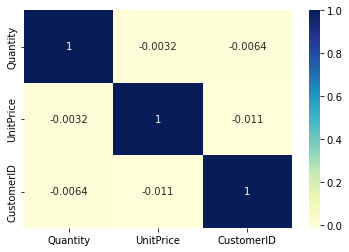

In [29]:
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
import seaborn as sb
print(df.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# We can deduce  there is a negative correlation between unit price and quanitity.
# More the quantity lesser the per unit price.

In [ ]:
# Converting table to get table for apriori algorithm
basket = pd.pivot_table(data=df,index='InvoiceNo',columns='Description',values='Quantity',aggfunc='sum',fill_value=0)
display(basket.head())

In [ ]:
print(basket['WHITE HANGING HEART T-LIGHT HOLDER'].head(10))

In [ ]:
def convert_to_binary(x):
    if x > 0:
        return 1
    else:
        return 0
basket_sets = basket.applymap(convert_to_binary)
print(basket_sets['WHITE HANGING HEART T-LIGHT HOLDER'].head(10))

In [ ]:
frequent_itemsets = apriori(basket_sets,min_support = 0.1, use_colnames=True)
print(frequent_itemsets)

In [ ]:
frequent_itemsets = apriori(basket_sets,min_support = 0.03, use_colnames=True)
display(frequent_itemsets)

In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

In [ ]:
display(frequent_itemsets[frequent_itemsets['length'] > 1].head(1))

In [ ]:
print(frequent_itemsets[frequent_itemsets['length'] > 1].head(1)['itemsets'])

In [ ]:
a=df.groupby('CustomerID').apply(','.join).reset_index()
print(a)